<a href="https://colab.research.google.com/github/kishunsu/detectmodel/blob/master/ssd_chaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!curl https://colab.chainer.org/install | sh -
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.9.2 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install chainer

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1580  100  1580    0     0   8272      0 --:--:-- --:--:-- --:--:--  8272
+ apt -y -q install cuda-libraries-dev-10-0
Reading package lists...
Building dependency tree...
Reading state information...
cuda-libraries-dev-10-0 is already the newest version (10.0.130-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
+ pip install -q cupy-cuda100  chainer 
     |████████████████████████████████| 335.2MB 47kB/s 
+ set +ex
Installation succeeded!


In [0]:
!pip install Pillow
!pip install Cython
!pip install Matplotlib
!pip install chainercv

     |████████████████████████████████| 266kB 4.0MB/s 
  Created wheel for chainercv: filename=chainercv-0.13.1-cp36-cp36m-linux_x86_64.whl size=537344 sha256=e80245863aa36189f991592b3623e71ebb780c9ac2f2c656344b0b43fe3c0d8b
  Stored in directory: /root/.cache/pip/wheels/ea/10/01/e221beaa4b3d8341aa819a39ab8d4677457c79c81f521f3a94
Successfully built chainercv


In [0]:
!wget https://cdn.pixabay.com/photo/2017/04/27/11/21/dog-2265233_960_720.jpg

--2020-05-09 05:35:11--  https://cdn.pixabay.com/photo/2017/04/27/11/21/dog-2265233_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109705 (107K) [image/jpeg]
Saving to: ‘dog-2265233_960_720.jpg’

dog-2265233_960_720 100%[===================>] 107.13K  --.-KB/s    in 0.008s  

2020-05-09 05:35:11 (12.5 MB/s) - ‘dog-2265233_960_720.jpg’ saved [109705/109705]



In [0]:
import matplotlib.pyplot as plt

import chainer

from chainercv.datasets import voc_bbox_label_names
from chainercv.links import SSD300
from chainercv import utils
from chainercv.visualizations import vis_bbox
%matplotlib inline

From: https://chainercv-models.preferred.jp/ssd300_voc0712_converted_2017_06_06.npz
To: /root/.chainer/dataset/_dl_cache/7580b6888d3f7742a1b531234009c0b0
  %   Total    Recv       Speed  Time left
100   93MiB   93MiB   9087KiB/s    0:00:00

/usr/local/lib/python3.6/dist-packages/chainercv/utils/link.py:72: RuntimeWarning: Although the pretrained model is trained using cv2 as the backend of resize function, the current setting does not use cv2 as the backend of resize function. The performance may change due to using different backends. To suppress this warning, set `chainer.config.cv_resize_backend = "cv2".
  RuntimeWarning)


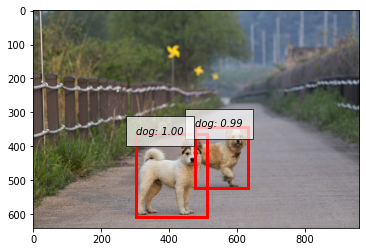

In [7]:
model = SSD300(
        n_fg_class=len(voc_bbox_label_names),
        pretrained_model='voc0712')

chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

img = utils.read_image('dog-2265233_960_720.jpg', color=True)

#推論処理の開始
bboxes, labels, scores = model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]

vis_bbox(
    img, bbox, label, score, label_names=voc_bbox_label_names)
plt.show()